0.2449489742783178 0.24494897427831783


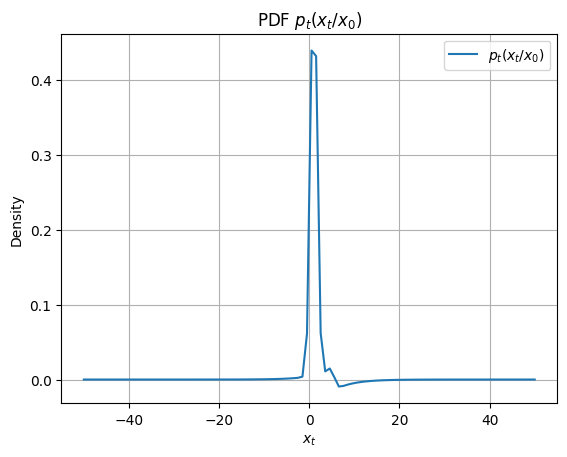

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import simps
from scipy.signal import fftconvolve

# Parameters
mu = 0.0
sigma = 1
r = 0.03
t = 0.5
x0 = 1.0
xR = 5

# Step 1: Solve quadratic for alpha and -beta
# 0.5 * sigma^2 * T^2 + mu*T - r = 0
a = 0.5 * sigma**2
b = mu
c = -r
T = t  # time parameter

roots = np.roots([a, b, c])
alpha = roots[0]
beta = -roots[1]  # because in the expression -β is used
print(alpha,beta) #both must be greater than 0
# Step 2: Define f_LDP(x)
def f_LDP(x):
    result = np.zeros_like(x)
    idx1 = x <= xR
    idx2 = x > xR
    C = alpha * beta / (alpha + beta)
    result[idx1] = C * np.exp(beta * (x[idx1] - xR))
    result[idx2] = C * np.exp(-alpha * (x[idx2] - xR))
    return result

# Step 3: Define f_W(x)
def f_W(x):
    return norm.pdf(x, loc=x0 + mu * t, scale=sigma * np.sqrt(t))

# Step 4: Compute convolution f_N * f_LDP
x_vals = np.linspace(-50, 50, 100)
dx = x_vals[1] - x_vals[0]
fN_vals = norm.pdf(x_vals, loc=0, scale=sigma * np.sqrt(t))
fLDP_vals = f_LDP(x_vals)
conv_vals = fftconvolve(fN_vals, fLDP_vals, mode='same') * dx

# Step 5: Calculate p_t(x_t / x_0)
fW_vals = f_W(x_vals)
p_t_vals = fLDP_vals + np.exp(-r * t) * (fW_vals - conv_vals)
print("violence",torch.sum(p_t_vals<0))
# print("yoo",conv_vals.sum(),fW_vals.sum(),fLDP_vals.sum())

# Plotting
plt.plot(x_vals, p_t_vals, label=r'$p_t(x_t/x_0)$')
plt.title('PDF $p_t(x_t/x_0)$')
plt.xlabel(r'$x_t$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
